In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [143]:
# reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [144]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [145]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Object variables
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
enginetype          205 non-null object
cylindernumber      205 non-null object
fuelsystem          205 non-null object

In [146]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [147]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [148]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

## Symboling is a category variable so we are removing the same.

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [149]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


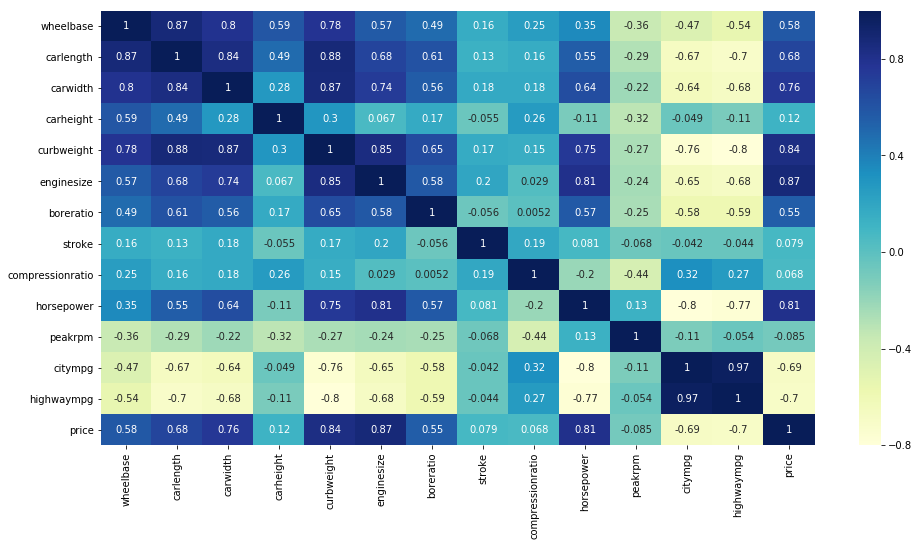

In [150]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Define x and Y variables

In [151]:
X =cars_numeric.drop('price',axis=1)
y=cars_numeric.price

In [152]:
from scipy.stats import zscore

In [153]:
X = X.apply(zscore) 

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [156]:
import statsmodels.api as sm 

In [157]:
lm = sm.OLS(y_train, X_train).fit() 

In [158]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.616
Date:                Wed, 31 Jul 2019   Prob (F-statistic):            0.00290
Time:                        16:47:01   Log-Likelihood:                -1563.2
No. Observations:                 143   AIC:                             3152.
Df Residuals:                     130   BIC:                             3191.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase          213.0445   3246.917  

Inference

Auto corrrelation - Is present as Durbin-Watson is 0.152 
Jarque-Bera (JB): 290.366 - Value is considerably low so it is normaly distributed 
No warnings related to Multicollinearity is present    

Check of linearity- Rainbow Test

In [159]:
sm.stats.diagnostic.linear_rainbow(lm, frac=0.5)

(1.541617571149426, 0.04463101625255572)

Rainbow test for linearity

The Null hypothesis is that the regression is correctly modelled as linear. The alternative for which the power might be large are convex, check


In [160]:
# Finding the Values
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

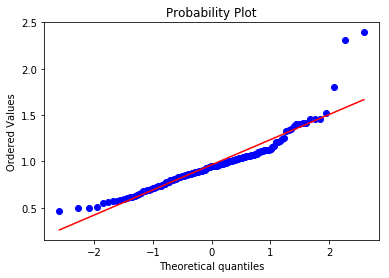

In [161]:
# QQ Plot - 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
stats.probplot(st_residual, dist="norm", plot=pylab)
plt.show()

Test for Multicollinearity 

In [162]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [163]:
# VIF - Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(X.values, col) 
                   for col in range(0, X.shape[1])]

In [164]:
ce = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']

In [165]:
vif["Feature Names"] = ce

In [166]:
vif

,VIF Values,Feature Names
0,7.340949,wheelbase
1,9.422999,carlength
2,5.586367,carwidth
3,2.205975,carheight
4,16.413371,curbweight
5,6.658982,enginesize
6,2.103912,boreratio
7,1.195781,stroke
8,2.175511,compressionratio
9,8.247880,horsepower


# Test of Heteroscedasticity - Goldfend Quandt test

1. Null Hypothesis - The Data is HOMOSCEDASTIC (Uniform Variance)
2. Alternate Hypothesis - Data is HETEROSCEDASTIC( Unequal Variance)

In [167]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt
het_goldfeldquandt(y, X)

(0.7825310868134381, 0.8758733171484134, 'increasing')

The data is  HOMOSCEDASTIC 

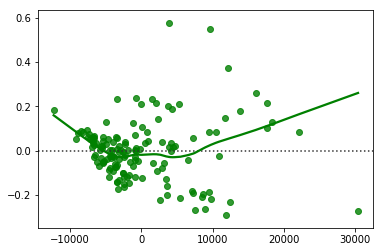

In [168]:
sns.residplot(lm.fittedvalues, np.sqrt(np.abs(st_residual)), lowess=True, color = "green")

Building a LR model

In [169]:
X1 =cars_numeric.drop(['price','citympg','highwaympg','curbweight'],axis=1)
y1=cars_numeric.price

In [170]:
X1 = X1.apply(zscore) 

In [171]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [172]:
lm = sm.OLS(y1_train, X1_train).fit() 

In [173]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.223
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           0.000956
Time:                        16:47:25   Log-Likelihood:                -1564.3
No. Observations:                 143   AIC:                             3149.
Df Residuals:                     133   BIC:                             3178.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase         1293.2079   3074.125  

In [174]:
ins_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [175]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.2253477510905526
0.17289733840397548


In [176]:
ins_model = sm.OLS(y1,X1).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X1) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [177]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.22408759522819466
0.18429721549630718


In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression() # created the machine learning algo

In [180]:
# use the lm to train my dataset
lm.fit(X1_train, y1_train) # Model is fitted on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [181]:
lm.predict(X1_test)

array([ 7265.81771752, 10149.40732227, 11045.74910398, 11659.96327143,
        7671.67686048, 11196.20399175, 17693.11707029, 19491.59249043,
       14050.17133978, 21336.87058105, 18626.09121296, 16818.56301012,
       16676.63278738, 11130.02358906, 39488.88566545,  6831.54342152,
        7265.81771752, 13863.04300073, 15498.48454901, 15532.49754488,
       17067.55530351, 17067.55530351, 24701.75512624,  6561.41058768,
       13966.58529102, 21484.87310615, 15532.49754488, 24173.92612135,
       12469.431882  , 10432.2213146 ,  7153.26682128, 26037.38580377,
       19341.61839565, 20662.34015406, 14725.33160215, 12907.35959555,
       16911.09952287, 13966.58529102,  6895.90022173, 10925.39272801,
       38154.57570312, 12290.38554643,  7249.10050777, 10054.57695681,
        5965.34325099, 11056.45425395,  6544.69337793, 11268.61427694,
       10064.58364306, 10466.14468951,  6380.51995677, 13966.58529102,
        6803.78784613, 11554.57553762, 19176.44672426,  9673.53361949,
      

In [182]:
# predict 
y1_pred = lm.predict(X1_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y1_test, y_pred=y1_pred))

0.8493553503415738


Polynomial 

In [183]:
from sklearn.preprocessing import PolynomialFeatures

In [184]:
pf = PolynomialFeatures()

In [185]:
# Transformed the Input Variabes for a better modelling
x = pf.fit_transform(X)

In [186]:
# Building the Model
ins_model = sm.OLS(y,x).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(x) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [187]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9733939150727501
0.9457235867484102


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [189]:
mean_absolute_error(y, ins_pred)

957.8800069132194

In [190]:
np.sqrt(mean_squared_error(y, ins_pred))

1299.9092474652389

In [191]:
y.mean()

13276.710570731706

Applying polynomial for X1

In [192]:
x = pf.fit_transform(X1)

In [193]:
# Building the Model
ins_model = sm.OLS(y1,x).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(x) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [194]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9434783101663459
0.9170473041290256


In [195]:
mean_absolute_error(y1, ins_pred)

1430.9621758648316